Voici le code qui permet de ressortir des informations des mails. La première partie est consacrée à une analyse qui permet de mettre en évidence la façon dont quelqu'un utilise sa boite mail. La deuxième partie est une analyse NLP qui permet de mettre en évidence comment gmail traite nos mails.

# I) Activité

In [1]:
import mailbox
mboxfile = './Tous les messages, y compris ceux du dossier Spam .mbox'
mbox = mailbox.mbox(mboxfile)

In [2]:
#ce qu'on trouve comment labels
for key in mbox[0].keys():
    print(key)

X-GM-THRID
X-Gmail-Labels
Delivered-To
Received
X-Google-Smtp-Source
X-Received
ARC-Seal
ARC-Message-Signature
ARC-Authentication-Results
Return-Path
Received
Received-SPF
Authentication-Results
Received
Received
Date
From
To
Message-ID
Subject
MIME-Version
Content-Type


In [3]:
#convertir en csv pour simplifier le format
import pandas as pd
import csv 
with open("mbox.csv", "w") as outfile:
    writer = csv.writer(outfile)
    for message in mbox:
        writer.writerow([message['subject'], message['from'], message['date'], message['to'],
                         message['X-Gmail-Labels'], message['X-GM-THRID']])

In [81]:
df = pd.read_csv('mbox.csv', names=['subject', 'from', 'date', 'to', 'label', 'thread'])
df['date'] = df['date'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))
df = df[df['date'].notna()]

In [82]:
df.head(5)

,subject,from,date,to,label,thread
0,�������������������� �������������������� ����...,������������������������ �������� ������������...,2020-11-17 14:42:33+00:00,mendes.drv.em@gmail.com,"=?UTF-8?Q?Spam,Cat=C3=A9gorie=C2=A0:_Mises_=C3...",1683618953472754384
1,=?windows-1252?Q?Dentelle._Perles._R=E9sille_:...,"""Promod"" <promod@news.promod.fr>",2020-11-13 11:16:04+00:00,<mendes.drv.em@gmail.com>,"=?UTF-8?Q?Corbeille,Cat=C3=A9gorie=C2=A0:_Prom...",1683243576065313185
2,=?utf-8?B?UmFwcGVsIDogQk5QIFBhcmliYXMgZXQgbGVz...,"""BNP Paribas"" <ne_pas_repondre@client.emailing...",2020-11-17 08:00:51+00:00,mendes.drv.em@gmail.com,"=?UTF-8?Q?Bo=C3=AEte_de_r=C3=A9ception,Cat=C3=...",1683594880773699513
3,"=?utf-8?q?=E2=8F=B3_Elsa,_n'oubliez_pas_vos_8=...","""Uber Eats"" <uber@uber.com>",2020-11-13 17:09:13+00:00,<mendes.drv.em@gmail.com>,"=?UTF-8?Q?Corbeille,Cat=C3=A9gorie=C2=A0:_Mise...",1683265792525925536
4,Inside: Newness =?UTF-8?Q?=F0=9F=91=80?=,"""Revolution Beauty"" <support@email.revolutionb...",2020-11-13 10:03:01+00:00,mendes.drv.em@gmail.com,"=?UTF-8?Q?Corbeille,Cat=C3=A9gorie=C2=A0:_Prom...",1683239106938206980


In [83]:
import re
def get_email_address(string):

    email = re.findall(r'<(.+?)>', string)
    if not email:
        email = list(filter(lambda y: '@' in y, string.split()))
    return email[0] if email else np.NAN

In [84]:
# apply to from column
df['from'] = df['from'].apply(lambda x: get_email_address(x))

# if email is from me, then it is sent, otherwiese it is in Inbox
me = 'mendes.drv.em@gmail.com'
#reçu ou envoyé => inbox ou sent pour les labels c'est plus parlant 
df['label'] = df['from'].apply(lambda x: 'sent' if x==me else 'inbox')

# drop "to" column
df.drop(columns='to', inplace=True)

In [85]:
df.head(5)

,subject,from,date,label,thread
0,�������������������� �������������������� ����...,nooreply@UG3.onehabiftchanges.com,2020-11-17 14:42:33+00:00,inbox,1683618953472754384
1,=?windows-1252?Q?Dentelle._Perles._R=E9sille_:...,promod@news.promod.fr,2020-11-13 11:16:04+00:00,inbox,1683243576065313185
2,=?utf-8?B?UmFwcGVsIDogQk5QIFBhcmliYXMgZXQgbGVz...,ne_pas_repondre@client.emailing.bnpparibas,2020-11-17 08:00:51+00:00,inbox,1683594880773699513
3,"=?utf-8?q?=E2=8F=B3_Elsa,_n'oubliez_pas_vos_8=...",uber@uber.com,2020-11-13 17:09:13+00:00,inbox,1683265792525925536
4,Inside: Newness =?UTF-8?Q?=F0=9F=91=80?=,support@email.revolutionbeauty.com,2020-11-13 10:03:01+00:00,inbox,1683239106938206980


In [86]:
# weekday name
df['dayofweek'] = df['date'].dt.day_name()
df['dayofweek'] = pd.Categorical(df['dayofweek'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
    'Saturday', 'Sunday'], ordered=True)

# time of day
df['timeofday'] = df['date'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)

# hour
df['hour'] = df['date'].apply(lambda x: x.hour)

# year integer
df['year_int'] = df['date'].apply(lambda x: x.year)

# year fraction
df['year'] = df['date'].apply(lambda x: x.year + x.dayofyear/365.25)

# set date to index
df.index = df['date']
del df['date']

In [87]:
df.head(5)

,subject,from,label,thread,dayofweek,timeofday,hour,year_int,year
date,,,,,,,,,
2020-11-17 14:42:33+00:00,�������������������� �������������������� ����...,nooreply@UG3.onehabiftchanges.com,inbox,1683618953472754384,Tuesday,14.709167,14,2020,2020.881588
2020-11-13 11:16:04+00:00,=?windows-1252?Q?Dentelle._Perles._R=E9sille_:...,promod@news.promod.fr,inbox,1683243576065313185,Friday,11.267778,11,2020,2020.870637
2020-11-17 08:00:51+00:00,=?utf-8?B?UmFwcGVsIDogQk5QIFBhcmliYXMgZXQgbGVz...,ne_pas_repondre@client.emailing.bnpparibas,inbox,1683594880773699513,Tuesday,8.014167,8,2020,2020.881588
2020-11-13 17:09:13+00:00,"=?utf-8?q?=E2=8F=B3_Elsa,_n'oubliez_pas_vos_8=...",uber@uber.com,inbox,1683265792525925536,Friday,17.153611,17,2020,2020.870637
2020-11-13 10:03:01+00:00,Inside: Newness =?UTF-8?Q?=F0=9F=91=80?=,support@email.revolutionbeauty.com,inbox,1683239106938206980,Friday,10.050278,10,2020,2020.870637


In [88]:
print(df.index.min().strftime('%a, %d %b %Y %I:%M %p'))
print(df.index.max().strftime('%a, %d %b %Y %I:%M %p'))
print('\n')
print(df['label'].value_counts())

Tue, 13 Nov 2012 11:43 AM
Tue, 17 Nov 2020 03:56 PM


inbox    1935
sent      343
Name: label, dtype: int64


In [89]:
import numpy as np
from matplotlib import ticker
import matplotlib.pyplot as plt
import datetime

def plot_tod_vs_year(df, ax, color='C0', s=0.5, title=''):

    ind = np.zeros(len(df), dtype='bool')

    df[~ind].plot.scatter('year', 'timeofday', s=s, alpha=0.6, ax=ax, color=color)
    ax.set_ylim(0, 24)
    ax.yaxis.set_major_locator(ticker.MaxNLocator(8))
    ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
                        for ts in ax.get_yticks()]);

    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(title)
    ax.grid(ls=':', color='k')

    return ax

<ipython-input-89-71f221687746>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")


<AxesSubplot:title={'center':'Received'}>

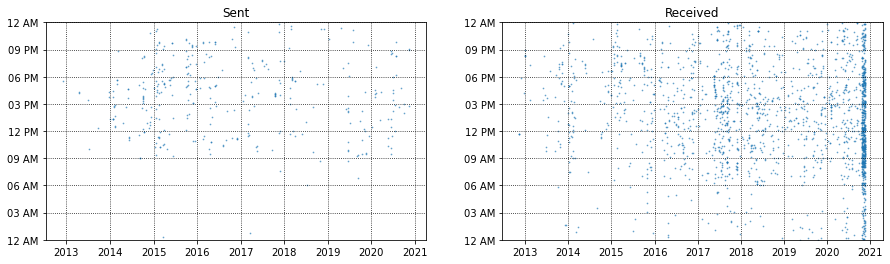

In [90]:
#heures d'envoie et de réception par année
sent = df[df['label']=='sent']
recvd = df[df['label']=='inbox']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

plot_tod_vs_year(sent, ax[0], title='Sent')
plot_tod_vs_year(recvd, ax[1], title='Received')

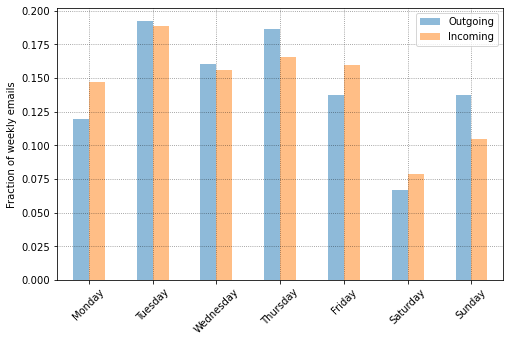

In [91]:
#les jours les plus actifs ?
sdw = sent.groupby('dayofweek').size() / len(sent)
rdw = recvd.groupby('dayofweek').size() / len(recvd)

df_tmp = pd.DataFrame(data={'Outgoing': sdw, 'Incoming':rdw})
df_tmp.plot(kind='bar', rot=45, figsize=(8,5), alpha=0.5)
plt.xlabel('');
plt.ylabel('Fraction of weekly emails');
plt.grid(ls=':', color='k', alpha=0.5)

# II) NLP 

Nous avons décidé de nous baser sur une base de données approuvée et vérifiée ( qui peut se trouver par exemple ici : https://www.kaggle.com/uciml/sms-spam-collection-dataset/ ) pourfaire de l'apprentissage. Ainsi nous avons une base avec des milliers de messages avec 1 label ham ou spam.  

In [52]:
import numpy as np 
import pandas as pd 

filepath= './spam.csv'
def readData_rawSMS(filepath):
    data_rawSMS = pd.read_csv(filepath, header=0, usecols=[0,1], encoding='latin-1')
    data_rawSMS.columns = ['label', 'content']
    return data_rawSMS

data_rawSMS = readData_rawSMS(filepath)
data_rawSMS.head()

,label,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# **Text Pre-processing**

In [53]:
#import nltk
#nltk.download()
from nltk.corpus import stopwords
#enlever les mots qui peuvent polluer la recherche et qui sont trouvés dans presques toutes les phrases 
print(stopwords.words('english'))

import string
print(string.punctuation)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [54]:
def text_process(mess):
    #Enlever la ponctuation , stopwords + retourner une liste avec un texte nettoyé 
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    nopunc = [char for char in mess if char not in string.punctuation] 
    nopunc = ''.join(nopunc)
    return ' '.join([word.lower() for word in nopunc.split() if word.lower() not in STOPWORDS])

data_rawSMS['clean_msg'] = data_rawSMS.content.apply(text_process)
data_rawSMS.head()

,label,content,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


In [55]:
#les mots souvent retrouvés 

from collections import Counter

def get_words(content):
    words = []
    for row in content:
        for j in row.split():
            words.append(j.strip())
    return words

counter = Counter(get_words(data_rawSMS['clean_msg']))
most_common = dict(counter.most_common(20))
print(most_common)

{'call': 576, 'get': 386, 'go': 278, 'ok': 277, 'ltgt': 276, 'free': 275, 'know': 257, 'like': 242, 'got': 238, 'ill': 237, 'good': 234, 'come': 226, 'time': 208, 'day': 202, 'love': 195, 'want': 192, 'send': 190, 'text': 188, 'going': 171, 'one': 170}


# **Machine Learning workflow avec la Vectorization**



**1) Diviser le training set et testing set**

In [56]:
data_rawSMS['label_num'] = data_rawSMS.label.map({'ham':0, 'spam':1})
data_rawSMS.head()

,label,content,clean_msg,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,0
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts 21s...,1
3,ham,U dun say so early hor... U c already then say...,dun say early hor c already say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though,0


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics

X = data_rawSMS.clean_msg
y = data_rawSMS.label_num
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

**2) Vectorisation**

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
# equivalently: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)
pd.DataFrame(X_train_dtm.toarray(), columns=vect.get_feature_names())

,008704050406,0089my,01223585236,01223585334,0125698789,02,020603,0207,02070836089,02073162414,...,zyada,åð,åòits,åômorrow,ìll,ìï,ûªve,ûïharry,ûò,ûówell
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# TfidfTransformer transform testing data (using fitted vocabulary) 
# into a document-term matrixvect = CountVectorizer()

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

<4179x7983 sparse matrix of type '<class 'numpy.float64'>'
	with 34778 stored elements in Compressed Sparse Row format>

In [60]:
X_test_dtm = vect.transform(X_test)
print(X_test_dtm.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**3) Construction et evaluation du model**

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20, random_state=0)

# train the model using X_train_dtm (timing it with an IPython "magic command")
%time clf = rf.fit(X_train_dtm, y_train)

CPU times: user 126 ms, sys: 109 µs, total: 126 ms
Wall time: 124 ms


In [62]:
# Extract single tree
estimator = rf.estimators_[5]

n_nodes = rf.estimators_[4].tree_.node_count
print(estimator, n_nodes)

DecisionTreeClassifier(max_features='auto', random_state=1537364731) 543


In [63]:
from sklearn.metrics import classification_report, confusion_matrix

y_predTest_class = rf.predict(X_test_dtm)

print("【 Testing 】")
print('Accuracy score: {}'.format(metrics.accuracy_score(y_test, y_predTest_class)))
print('Precision score: {}'.format(metrics.precision_score(y_test, y_predTest_class)))
print('Recall score: {}'.format(metrics.recall_score(y_test,y_predTest_class)))
print('F1 score: {}'.format(metrics.f1_score(y_test, y_predTest_class)))

print(classification_report(y_test,y_predTest_class))


【 Testing 】
Accuracy score: 0.968413496051687
Precision score: 1.0
Recall score: 0.7647058823529411
F1 score: 0.8666666666666666
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1206
           1       1.00      0.76      0.87       187

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.92      1393
weighted avg       0.97      0.97      0.97      1393



In [64]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, clf.predict_proba(X_test_dtm)[:,1])

0.9836978210551519

De bons scores !

# **Nous pouvons maintenant tester nos mails et prédire si c'est un SPAM ou pas.**

In [66]:
# pip install deep-translator
from deep_translator import GoogleTranslator

#erreur quand sujet du mail très mal formaté
with open("mail_nlp.csv", "w") as outfile:
    writer = csv.writer(outfile)
    for message in mbox:
        try:
            translated = GoogleTranslator(source='auto', target='en').translate(message['subject']) 
            writer.writerow([translated])
        except Exception:
            pass
        

In [78]:
import pandas as pd

#pour filtrer les mails ayant des caractères difficiles à comprendre
mot="=?"

df = pd.read_csv('mail_nlp.csv', names=['subject'])

Liste_mail= []
for i in df['subject']:
    if mot not in i  : 
        Liste_mail.append(i)

#choisir un intervalle de mail à regarder pour plus de rapidité
print(Liste_mail[18:22])


['[GitHub] @lsdch has invited you to join the @GOTIT-DEV organization', 'COVID-19: How to reach Matmut?', 'jph69160@gmail.com sent you files via WeTransfer', 'Mme LOURO PIEDADE, your consumption in euros every day!']


In [80]:
for mail in Liste_mail[18:22]:
    clean_text = text_process(mail)
    print(clean_text)
    simple_test_dtm = vect.transform([clean_text])
    #print(simple_test_dtm.toarray(), simple_test_dtm.reshape(1,-1).shape)

    y_predSimpleTest_class = rf.predict(simple_test_dtm.reshape(1,-1))
    if int(y_predSimpleTest_class) == 1:
        print ('SPAM: {}'.format(mail))
    else:
        print ('ham: {}'.format(mail)) 
    print("*************************")

github lsdch invited join gotitdev organization
ham: [GitHub] @lsdch has invited you to join the @GOTIT-DEV organization
*************************
covid19 reach matmut
ham: COVID-19: How to reach Matmut?
*************************
jph69160gmailcom sent files via wetransfer
ham: jph69160@gmail.com sent you files via WeTransfer
*************************
mme louro piedade consumption euros every day
ham: Mme LOURO PIEDADE, your consumption in euros every day!
*************************


Ces mails sont effectivement des mails qui ne sont pas des spams ! Il semble que notre modèle marche bien ! 